# Bank Customer Segmentation using Cluster Analysis

# Case Description

You are working for an international bank. The credit department is reviewing its offerings and wants to get a better understanding of its current customers. You have been tasked with performing customer segmentation analysis. You decide to perform cluster analysis using the k-means clustering algorithm to identify groups of similar customers.

# Purpose of the Analysis
As a business data analyst, your task is to segment bank's customers based on their similarities on certain relevant attributes. The bank's marketing department will then use the identified segments to tailor different marketing strategies for each segment.

# The Data

The dataset contains 1000 instances (rows) and a number of attributes. This dataset is provided by a German bank. Each row represents a bank customer who borrowed from the bank. 

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (good or bad credit risk)<br>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv('./desktop/data/german_credit_data.csv')

In [29]:
#show data frame
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [30]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## DATA PREPROCESSING
---

In [31]:
#check the null values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

#### The three numeric variables (age, duration of loan, credit amount) have no missing values

### Create a subset of the three numeric variables for clustering

In [32]:
num_df = df[['Age', 'Duration', 'Credit amount', 'Job' ]]

### Standardize (Perform Standard Scaling)

In [33]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [34]:
#show scaled dataset shape and values


In [35]:
#show scaled dataset shape
num_df_scaled.shape

(1000, 4)

In [36]:
#show scaled dataset values
num_df_scaled

array([[ 2.76645648, -1.23647786, -0.74513141,  0.14694918],
       [-1.19140394,  2.24819436,  0.94981679,  0.14694918],
       [ 1.18331231, -0.73866754, -0.41656241, -1.38377145],
       ...,
       [ 0.21583532, -0.73866754, -0.87450324,  0.14694918],
       [-1.10345149,  1.9992892 , -0.50552769,  0.14694918],
       [-0.75164167,  1.9992892 ,  0.46245715,  0.14694918]])

# Perform k-Means Clustering

## First, use the Elbow method to determine optimal number of clusters

In [37]:
from sklearn.cluster import KMeans

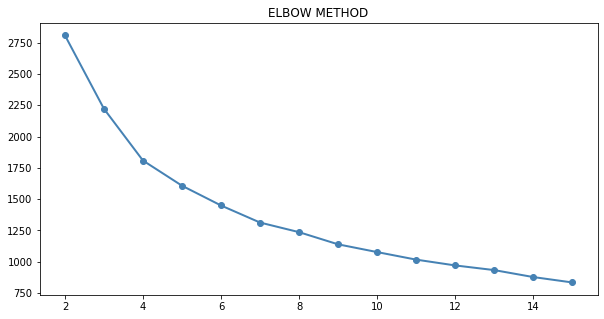

In [38]:
# NOTE: Inertia refers to within cluster sum of squares (WCSS)

inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

### Fit the clustering model for 4 clusters

In [39]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(num_df_scaled)

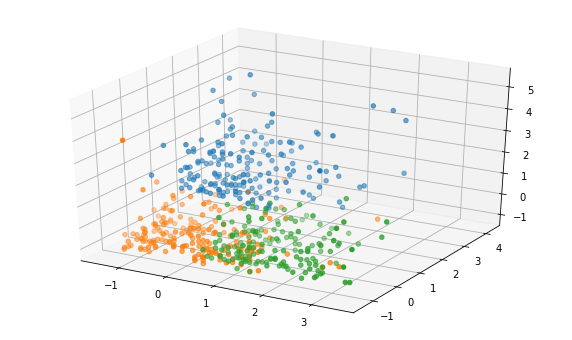

In [40]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])
    


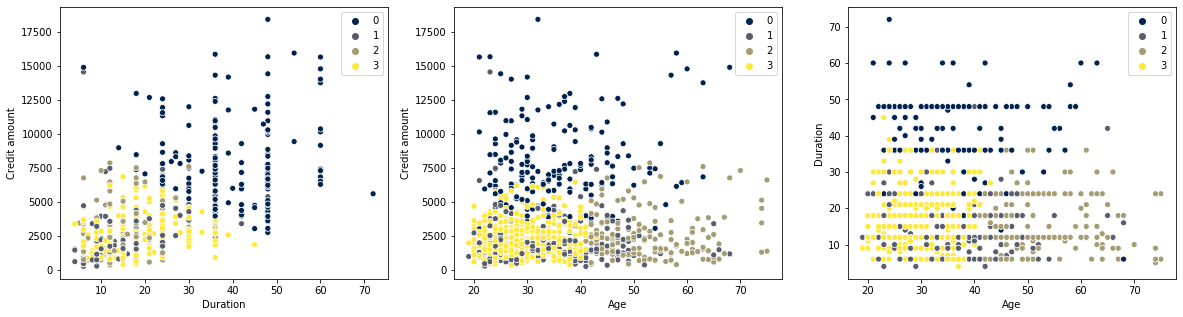

In [41]:
# Draw bi-variate scatter plots

fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(df['Duration'], df['Credit amount'], hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(df['Age'], df['Credit amount'], hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(df['Age'], df['Duration'], hue=clusters, ax=ax[2], palette='cividis');

### Summarize the Results

In [42]:
# Create a data frame for sumarized results
df_clustered = df[['Age', 'Duration', 'Credit amount', 'Job']]

In [43]:
df_clustered.head()

,Age,Duration,Credit amount,Job
0,67,6,1169,2
1,22,48,5951,2
2,49,12,2096,1
3,45,42,7882,2
4,53,24,4870,2


In [44]:
# Add a cluster# column to the data frame
# to see which customers are in which cluster
df_clustered['cluster'] = clusters
df_clustered.head()

,Age,Duration,Credit amount,Job,cluster
0,67,6,1169,2,2
1,22,48,5951,2,0
2,49,12,2096,1,1
3,45,42,7882,2,0
4,53,24,4870,2,2


In [45]:
# Calculate cluster means
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount,Job
cluster,,,,
0,35.175141,39.548023,7841.564972,2.276836
1,34.734375,15.135417,2100.927083,0.890625
2,53.077844,16.449102,2492.455090,2.029940
3,29.713362,17.780172,2292.420259,2.135776


## Interpret the Results

* Cluster 0 are second older customers, around 35, with longest loan duration and highest credit amount, they are also the highest skills group compares to the rest segmentations.
* Cluster 1 has customers' ages very close with cluster 0, on average around 35 as well, however, they have the lowest loan duration and the smallest credit amount, also, this group is unskilled and non-resident.
* Cluster 2 are the oldest customers, place the second lowest loan duration, moderate credit amount, and they are considred as skilled.
* Cluster 3 are the youngest customers, they also have low loan duration, low credit amount, but they are considered skilled group.

* The K-values in this case is 14 possible clusters that the dataset can be grouped. However, the optimum number of clusters based on the Elbow method graph are 4 since after that the inertia value starts to decrease more slowly, which means if we kept adding more clusters, the group of data points are close to each other and split close observations into multiple ones, even though they are very similar.
* Based on the 4 clusters, we learn that the segementation 0, who are around 35 years old having skills are having the longest loan duration and credit amount. This could be because they have purchasing power and willing to spend, they also make big purchase which could be long-term investment such as home mortgate which extend the loan duration on average. While the almost same age segmentation, who are 35 (34.7), unskilled and non-resident are having the shortest loan duration and credit amount. This could be because they are not approved for the high credit since they do not have income proof.
* The cluster 2, who are around 53 years old, although having skills and moderate credit amount, but their loan duration place the second shortest. Most likely they have less obligations since they almsot done with the parenthood stage while they might have saving or generate more income/stable income which helps them to pay off the loan faster, which cut down the paid off duration. However, this needs further analysis such as income, family status (any children dependency), savig, geographic, as well as housing properties in order to explain why this group are skill but moderate credit amount and having almost shortest loan duration.
* Lastly cluster 3, who are the youngest customer segementation, they are skilled, but credit amount and loan duration are much lower then segmentation 0, I suggest further analysis to get insigts details such as marraige status (single people tends to prefer renting, while married couple prefer settle down by purchasing a house together which will increase the credit loan amound and its duration).

